# Main Jupyter Notebook

## Data preparation

In [1]:
from importnb import imports
with imports("ipynb"):
    from contributions.common.functions import (
        load_dataset,
        load_parameters,
        clean_up_dataset,
        print_feature_outliers,
        remove_outliers,
        generate_numerical_eda_visualization,
        generate_categorical_count_visualization,
        generate_numerical_heatmap,
        generate_numerical_categorical_heatmap,
        generate_numerical_vs_categorical_eda_visualization,
        generate_kprototype_cost_curve,
        generate_kprototype_clusters,
        generate_decision_tree_classifier,
        generate_confusion_matrix,
        generate_decision_tree
    )

In [2]:
DatasetRaw = load_dataset("dataset")
parameters = load_parameters(".")
DatasetRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  209734 non-null  int64         
 1   title               209734 non-null  string        
 2   is_paid             209734 non-null  bool          
 3   price               209734 non-null  float64       
 4   headline            209707 non-null  string        
 5   num_subscribers     209734 non-null  int64         
 6   avg_rating          209734 non-null  float64       
 7   num_reviews         209734 non-null  int64         
 8   num_comments        209734 non-null  int64         
 9   num_lectures        209734 non-null  int64         
 10  content_length_min  209734 non-null  int64         
 11  published_time      209734 non-null  object        
 12  last_update_date    209597 non-null  datetime64[ns]
 13  category            209734 no

In [3]:
CleanUpDataset = clean_up_dataset(DatasetRaw, parameters)
CleanUpDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166104 entries, 0 to 166103
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   price               166104 non-null  float64 
 1   num_subscribers     166104 non-null  int64   
 2   avg_rating          166104 non-null  float64 
 3   num_lectures        166104 non-null  int64   
 4   content_length_min  166104 non-null  int64   
 5   category            166104 non-null  category
 6   subcategory         166104 non-null  category
 7   language            166104 non-null  category
 8   instructor_name     166104 non-null  category
dtypes: category(4), float64(2), int64(3)
memory usage: 10.2 MB


In [4]:
RemovedOutlierDataset = remove_outliers(CleanUpDataset)
RemovedOutlierDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106240 entries, 0 to 106239
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   price               106240 non-null  float64 
 1   num_subscribers     106240 non-null  int64   
 2   avg_rating          106240 non-null  float64 
 3   num_lectures        106240 non-null  int64   
 4   content_length_min  106240 non-null  int64   
 5   category            106240 non-null  category
 6   subcategory         106240 non-null  category
 7   language            106240 non-null  category
 8   instructor_name     106240 non-null  category
dtypes: category(4), float64(2), int64(3)
memory usage: 7.4 MB


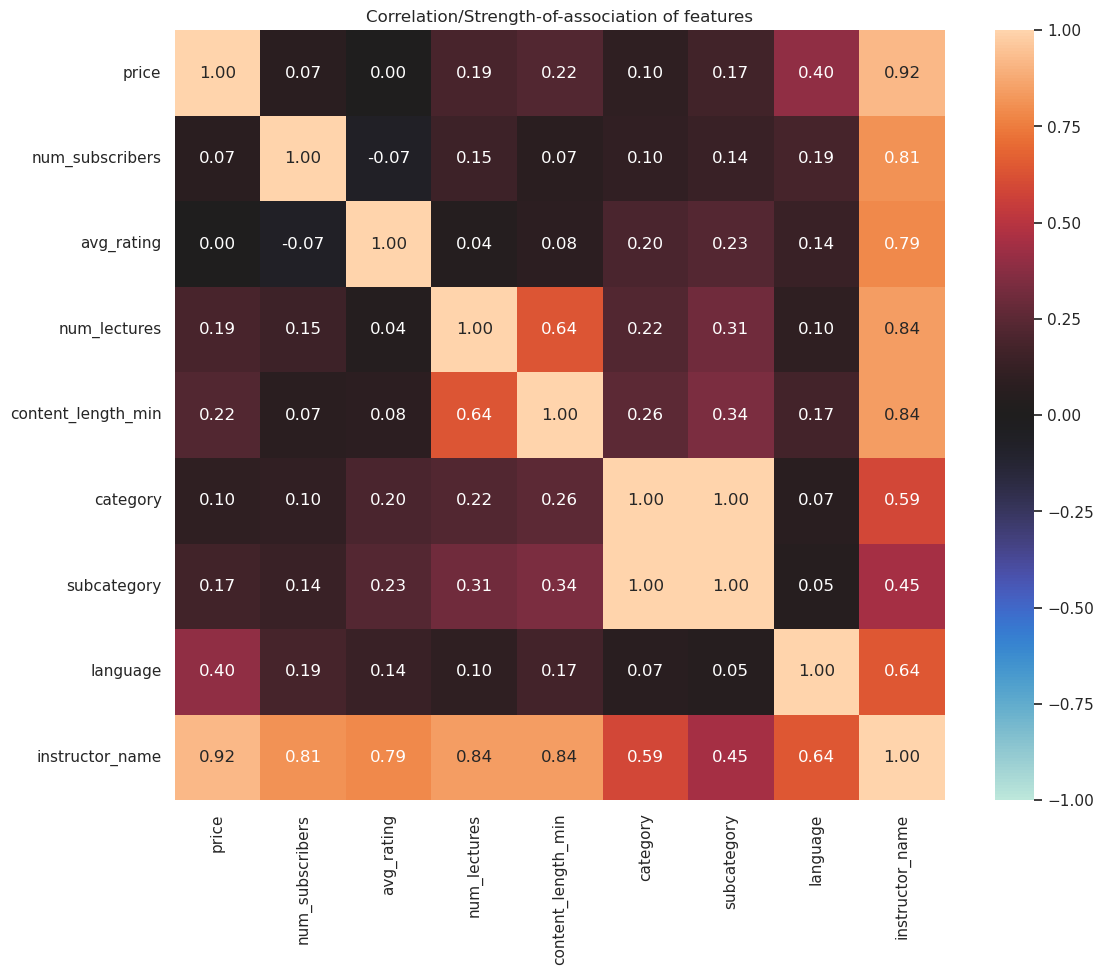

In [5]:
generate_numerical_categorical_heatmap(RemovedOutlierDataset)

In [ ]:
generate_kprototype_cost_curve(RemovedOutlierDataset, parameters)

In [6]:
AddClusterDataset, cluster_ids = generate_kprototype_clusters(RemovedOutlierDataset, parameters)

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 20258, ncost: 2541625111.1934404
Run: 1, iteration: 2/100, moves: 16452, ncost: 2390974057.111519
Run: 1, iteration: 3/100, moves: 9281, ncost: 2334262393.010762
Run: 1, iteration: 4/100, moves: 5009, ncost: 2309369069.0456066
Run: 1, iteration: 5/100, moves: 3361, ncost: 2296050584.0185957
Run: 1, iteration: 6/100, moves: 2495, ncost: 2286665425.6843147
Run: 1, iteration: 7/100, moves: 1901, ncost: 2279737831.661333
Run: 1, iteration: 8/100, moves: 1585, ncost: 2274865900.8137937
Ru

In [ ]:
# generate_numerical_categorical_heatmap(AddClusterDataset)

In [ ]:
# decision_tree_classier = generate_decision_tree_classifier(AddClusterDataset, parameters)

In [ ]:
# generate_confusion_matrix(decision_tree_classier)

In [ ]:
# generate_decision_tree(decision_tree_classier, parameters)